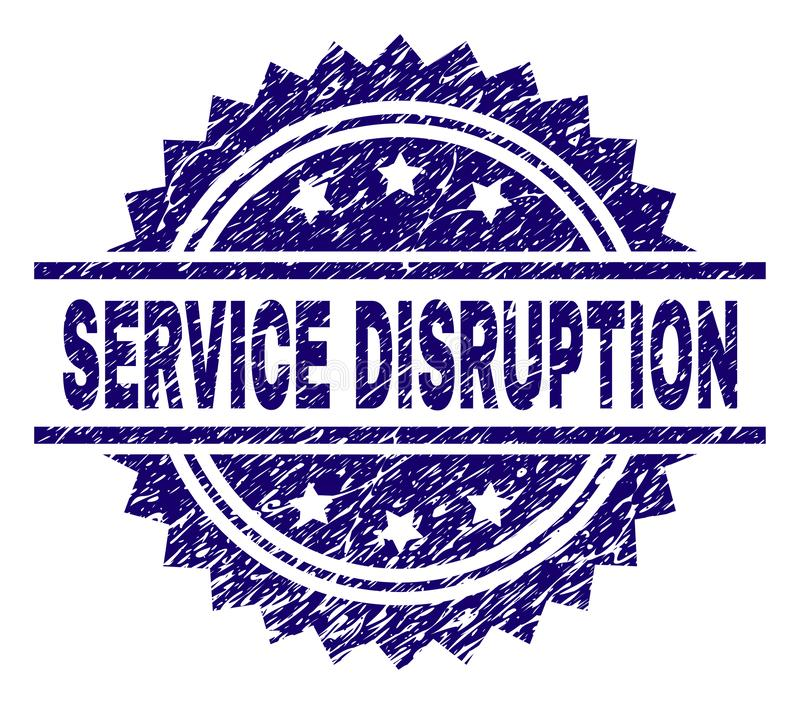

# Business Objective

A telecom company is interested in developing an advanced predictive model to
predict service disruptions based on the log files generated by multiple devices.
We have to output a csv file that can be handed to the operations team so they
can priorities dispatch of technicians based on fault_severity prediction and its
probability

# Data Preparation

▪ Step 1: Import Modules

▪ Step 2: Import Datasets
    
Each row in the main dataset (train.csv, test.csv) represents a location and a time point. They are identified by the
"id" column, which is the key "id" used in other data files. Fault severity has 3 categories: 0,1,2 (0 meaning no
fault, 1 meaning only a few, and 2 meaning many). “fault_severity” is a measurement of actual reported faults
from users of the network and is the target variable (in train.csv).    

• Step 3: Data preprocessing

• Step 4: Data merging to create a single record (CAR)

• Step 5: Remove text from variables
Features are extracted from log files and other sources:
event_type.csv, log_feature.csv, resource_type.csv,
severity_type.csv. All above features are categorical except for
"volume".

• Step 6: Drop ”fault_severity” from train dataset as it is
the target variable

• Step 7: Merge the train dataframe without the
“fault_severity” column and the combined dataframe of
“event_type … etc”

• Step 8: Create dummy variables

• Step 9: groupby “id”

# Modeling

##### Algorithm Selection
##### A wide class of models can be used for Network Disruption Prediction
##### ▪ Logistic Regression
##### ▪ Random Forest
##### ▪ Gradient Boosting
##### ▪ K-Nearest Neighbors
##### ▪ Decision Trees
##### Among Ensemble Methods, we have chosen Gradient Boosting Classifier because generally its better performance. 

In [1]:
#▪ Step 1: Import Modules
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
def classification(x,y):
    

    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    xgb=XGBClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[k,d,log,gbc,rf,xgb]
    algos_name=['KNeigbors','DecisionTree','LogisticRegr','GradientBoosting','RandomForest','XGB']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='weighted'))
        recall.append(recall_score(y_test,predict,average='weighted'))
        f1.append(f1_score(y_test,predict,average='weighted'))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\P1-P4 Service Distruption

29.07.2022  12:56    <DIR>          .
29.07.2022  12:56    <DIR>          ..
29.07.2022  11:20    <DIR>          .ipynb_checkpoints
14.11.2016  14:02           604.547 event_type.csv
14.11.2016  14:02         1.137.312 log_feature.csv
29.07.2022  10:41        11.395.363 PBL - Predictive Model for Service Disruptions.pdf
14.11.2016  14:02           451.101 resource_type.csv
29.07.2022  12:56           275.150 Service Disruption.ipynb
14.11.2016  14:01           397.055 severity_type.csv
14.11.2016  14:02           151.234 train.csv
               7 File(s)     14.411.762 bytes
               3 Dir(s)  85.599.817.728 bytes free


In [4]:
#▪ Step 2: Import Datasets
filenames = [ 'event_type.csv', 'log_feature.csv', 'resource_type.csv', 'severity_type.csv']
dataframes = [pd.read_csv(f) for f in filenames]

In [5]:
#• Step 4: Data merging to create a single record (CAR)
from functools import reduce
df5 = reduce(lambda df1,df2: pd.merge(df1, df2, on='id'), dataframes)

In [6]:
df5.head()

,id,event_type,log_feature,volume,resource_type,severity_type
0,6597,event_type 11,feature 68,6,resource_type 8,severity_type 2
1,8011,event_type 15,feature 68,7,resource_type 8,severity_type 2
2,2597,event_type 15,feature 68,1,resource_type 8,severity_type 2
3,5022,event_type 15,feature 172,2,resource_type 8,severity_type 1
4,5022,event_type 15,feature 56,1,resource_type 8,severity_type 1


In [7]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146423 entries, 0 to 146422
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             146423 non-null  int64 
 1   event_type     146423 non-null  object
 2   log_feature    146423 non-null  object
 3   volume         146423 non-null  int64 
 4   resource_type  146423 non-null  object
 5   severity_type  146423 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.8+ MB


In [8]:
#• Step 5: Remove text from variables
#one linear of the following code
df5.replace({"event_type ": "", "resource_type ": "", "severity_type ":"", "feature ":""}, regex=True, inplace=True)
df5

,id,event_type,log_feature,volume,resource_type,severity_type
0,6597,11,68,6,8,2
1,8011,15,68,7,8,2
2,2597,15,68,1,8,2
3,5022,15,172,2,8,1
4,5022,15,56,1,8,1
...,...,...,...,...,...,...
146418,8720,11,209,1,8,1
146419,6488,11,54,3,8,2
146420,878,11,62,1,8,2
146421,4464,11,209,1,8,1


In [9]:
df5.shape

(146423, 6)

In [10]:
df6=pd.read_csv('train.csv')
df6

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0
...,...,...,...
7376,870,location 167,0
7377,18068,location 106,0
7378,14111,location 1086,2
7379,15189,location 7,0


In [11]:
#I deleted the location part before the numbers
df6.replace({"location ": ""},regex=True,inplace=True)
df6

,id,location,fault_severity
0,14121,118,1
1,9320,91,0
2,14394,152,1
3,8218,931,1
4,14804,120,0
...,...,...,...
7376,870,167,0
7377,18068,106,0
7378,14111,1086,2
7379,15189,7,0


In [12]:
df5.info(),df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146423 entries, 0 to 146422
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             146423 non-null  int64 
 1   event_type     146423 non-null  object
 2   log_feature    146423 non-null  object
 3   volume         146423 non-null  int64 
 4   resource_type  146423 non-null  object
 5   severity_type  146423 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


(None, None)

In [13]:
df6["location"] = df6["location"].astype ("category")
df5["event_type"] = df5["event_type"].astype ("category")
df5["resource_type"] = df5["resource_type"].astype ("category")
df5["severity_type"] = df5["severity_type"].astype ("category")
df5["log_feature"] = df5["log_feature"].astype ("category")


In [14]:
df5.info(),df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146423 entries, 0 to 146422
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             146423 non-null  int64   
 1   event_type     146423 non-null  category
 2   log_feature    146423 non-null  category
 3   volume         146423 non-null  int64   
 4   resource_type  146423 non-null  category
 5   severity_type  146423 non-null  category
dtypes: category(4), int64(2)
memory usage: 4.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              7381 non-null   int64   
 1   location        7381 non-null   category
 2   fault_severity  7381 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 169.4 KB


(None, None)

In [15]:
df5.quantile(.97)

id        17961.0
volume       50.0
Name: 0.97, dtype: float64

In [16]:
y=df6['fault_severity']


In [17]:
#• Step 6: Drop ”fault_severity” from train dataset as it isthe target variable
df6=df6.drop(['fault_severity'],axis=1)

In [18]:

df7=pd.merge(df6,df5)
df7=df7.drop_duplicates(subset=['id'])#remove repetitive data so you have real data
df7.reset_index(drop=True,inplace=True)#indexes were mixed, re-indexed
df7

,id,location,event_type,log_feature,volume,resource_type,severity_type
0,14121,118,34,312,19,2,2
1,9320,91,34,315,200,2,2
2,14394,152,35,221,1,2,2
3,8218,931,15,80,9,8,1
4,14804,120,34,134,1,2,1
...,...,...,...,...,...,...,...
7376,870,167,34,232,1,2,2
7377,18068,106,20,219,1,2,1
7378,14111,1086,15,82,21,8,2
7379,15189,7,11,191,3,8,1


In [19]:
#• Step 8: Create dummy variables
df7=pd.get_dummies(df7,drop_first=True)
df7

,id,volume,location_10,location_100,location_1000,location_1002,location_1005,location_1006,location_1007,location_1008,location_1009,location_101,location_1010,location_1011,location_1013,location_1014,location_1015,location_1016,location_1017,location_1018,location_1019,location_102,location_1020,location_1021,location_1022,location_1023,location_1024,location_1025,location_1026,location_1027,location_1029,location_103,location_1030,location_1031,location_1032,location_1033,location_1034,location_1035,location_1036,location_1037,location_1038,location_104,location_1041,location_1042,location_1044,location_1045,location_1046,location_1047,location_1048,location_1049,...,log_feature_66,log_feature_67,log_feature_68,log_feature_69,log_feature_7,log_feature_70,log_feature_71,log_feature_72,log_feature_73,log_feature_74,log_feature_75,log_feature_76,log_feature_77,log_feature_78,log_feature_79,log_feature_8,log_feature_80,log_feature_81,log_feature_82,log_feature_83,log_feature_84,log_feature_85,log_feature_86,log_feature_87,log_feature_88,log_feature_89,log_feature_9,log_feature_90,log_feature_91,log_feature_92,log_feature_93,log_feature_94,log_feature_95,log_feature_96,log_feature_97,log_feature_98,log_feature_99,resource_type_10,resource_type_2,resource_type_3,resource_type_4,resource_type_5,resource_type_6,resource_type_7,resource_type_8,resource_type_9,severity_type_2,severity_type_3,severity_type_4,severity_type_5
0,14121,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,9320,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,14394,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,8218,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,14804,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,870,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7377,18068,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7378,14111,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7379,15189,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
x=pd.DataFrame()
x=df7

In [21]:
classification(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
XGB,0.704807,0.687293,0.704807,0.691099
RandomForest,0.687881,0.665012,0.687881,0.670119
DecisionTree,0.664861,0.662751,0.664861,0.663357
GradientBoosting,0.691943,0.669379,0.691943,0.643056
LogisticRegr,0.650643,0.588534,0.650643,0.557025
KNeigbors,0.589709,0.510613,0.589709,0.528837


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=13)


# Gradient Boosting Algorithm 

In [23]:
xgb=XGBClassifier()
pred_xgb=xgb.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,pred_xgb),f1_score(y_test,pred_xgb,average='weighted')

(0.7210561949898443, 0.698487820311992)

# Prediction Probability 

In [24]:
y_pred_proba_xgb=xgb.predict_proba(x_test)


# Output file
#### Creating a dataframe with predictions and probabilty of prediction

In [25]:
result=pd.DataFrame({'id':x_test.id,
                     'Predicted fault_severity':pred_xgb,
                    'Prediction_probability_0':y_pred_proba_xgb[:,0],
                    'Prediction_probability_1':y_pred_proba_xgb[:,1],
                    'Prediction_probability_2':y_pred_proba_xgb[:,2]},
                   columns=['id','Predicted fault_severity','Prediction_probability_0','Prediction_probability_1','Prediction_probability_2'])

In [26]:
result.head()

,id,Predicted fault_severity,Prediction_probability_0,Prediction_probability_1,Prediction_probability_2
3295,2783,0,0.960635,0.038989,0.000375
4972,3756,1,0.393842,0.572749,0.033408
2200,14355,0,0.869779,0.106585,0.023636
5204,16993,2,0.346545,0.102397,0.551058
375,8935,0,0.485957,0.464340,0.049703
